In [4]:
import numpy as np
import pandas as pd
!pip install matplotlib
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.6 kB ? eta -:--:--
   - ------

In [8]:
url = 'https://www.kaggle.com/datasets/geoffnel/evs-one-electric-vehicle-dataset/data?select=ElectricCarData_Clean.csv'
df = pd.read_csv('C:/Users/DONKAMS/Downloads/ElectricCarData_Clean.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [10]:
df.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,7.000000,215000.000000


1. Which car has the fastest 0-100 acceleration?
2. Which has the highest efficiency?
3. Does a difference in power train effect the range, top speed, efficiency?
4. Which manufacturer has the most number of vehicles?
5. How does price relate to rapid charging?

In [11]:
max_acc = max(df["AccelSec"])

df[df["AccelSec"] == max_acc]

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
68,Renault,Kangoo Maxi ZE 33,22.4,130,160,194,-,No,FWD,Type 2,SPV,N,5,38000


<BarContainer object of 103 artists>

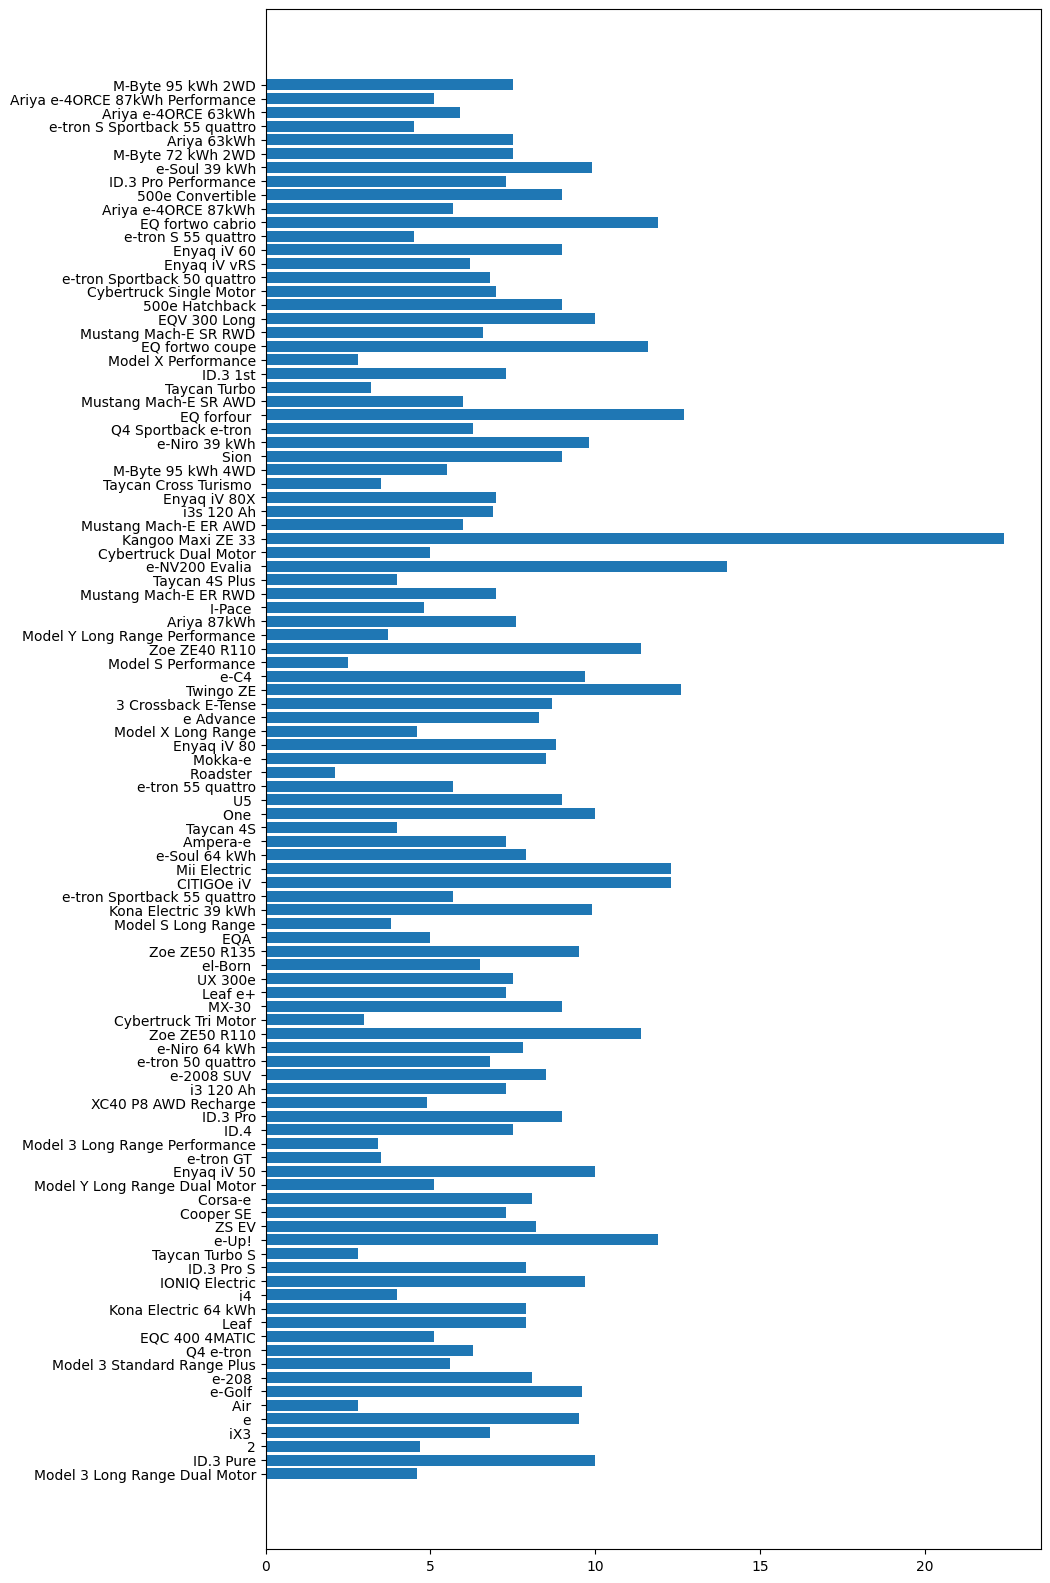

In [14]:
fig = plt.figure(figsize = (10, 20))
plt.barh(df["Model"], df["AccelSec"])
#plt.xticks(rotation = 90)

In [15]:
max_eff = max(df["Efficiency_WhKm"])

df[df["Efficiency_WhKm"] == max_eff]

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
84,Mercedes,EQV 300 Long,10.0,140,330,273,290,Yes,FWD,Type 2 CCS,SPV,N,7,70631


In [16]:
df_c = df[["Model", "Efficiency_WhKm"]]
df_c = df_c.sort_values(by = "Efficiency_WhKm", ascending=False).reset_index()

Text(0, 0.5, 'Model')

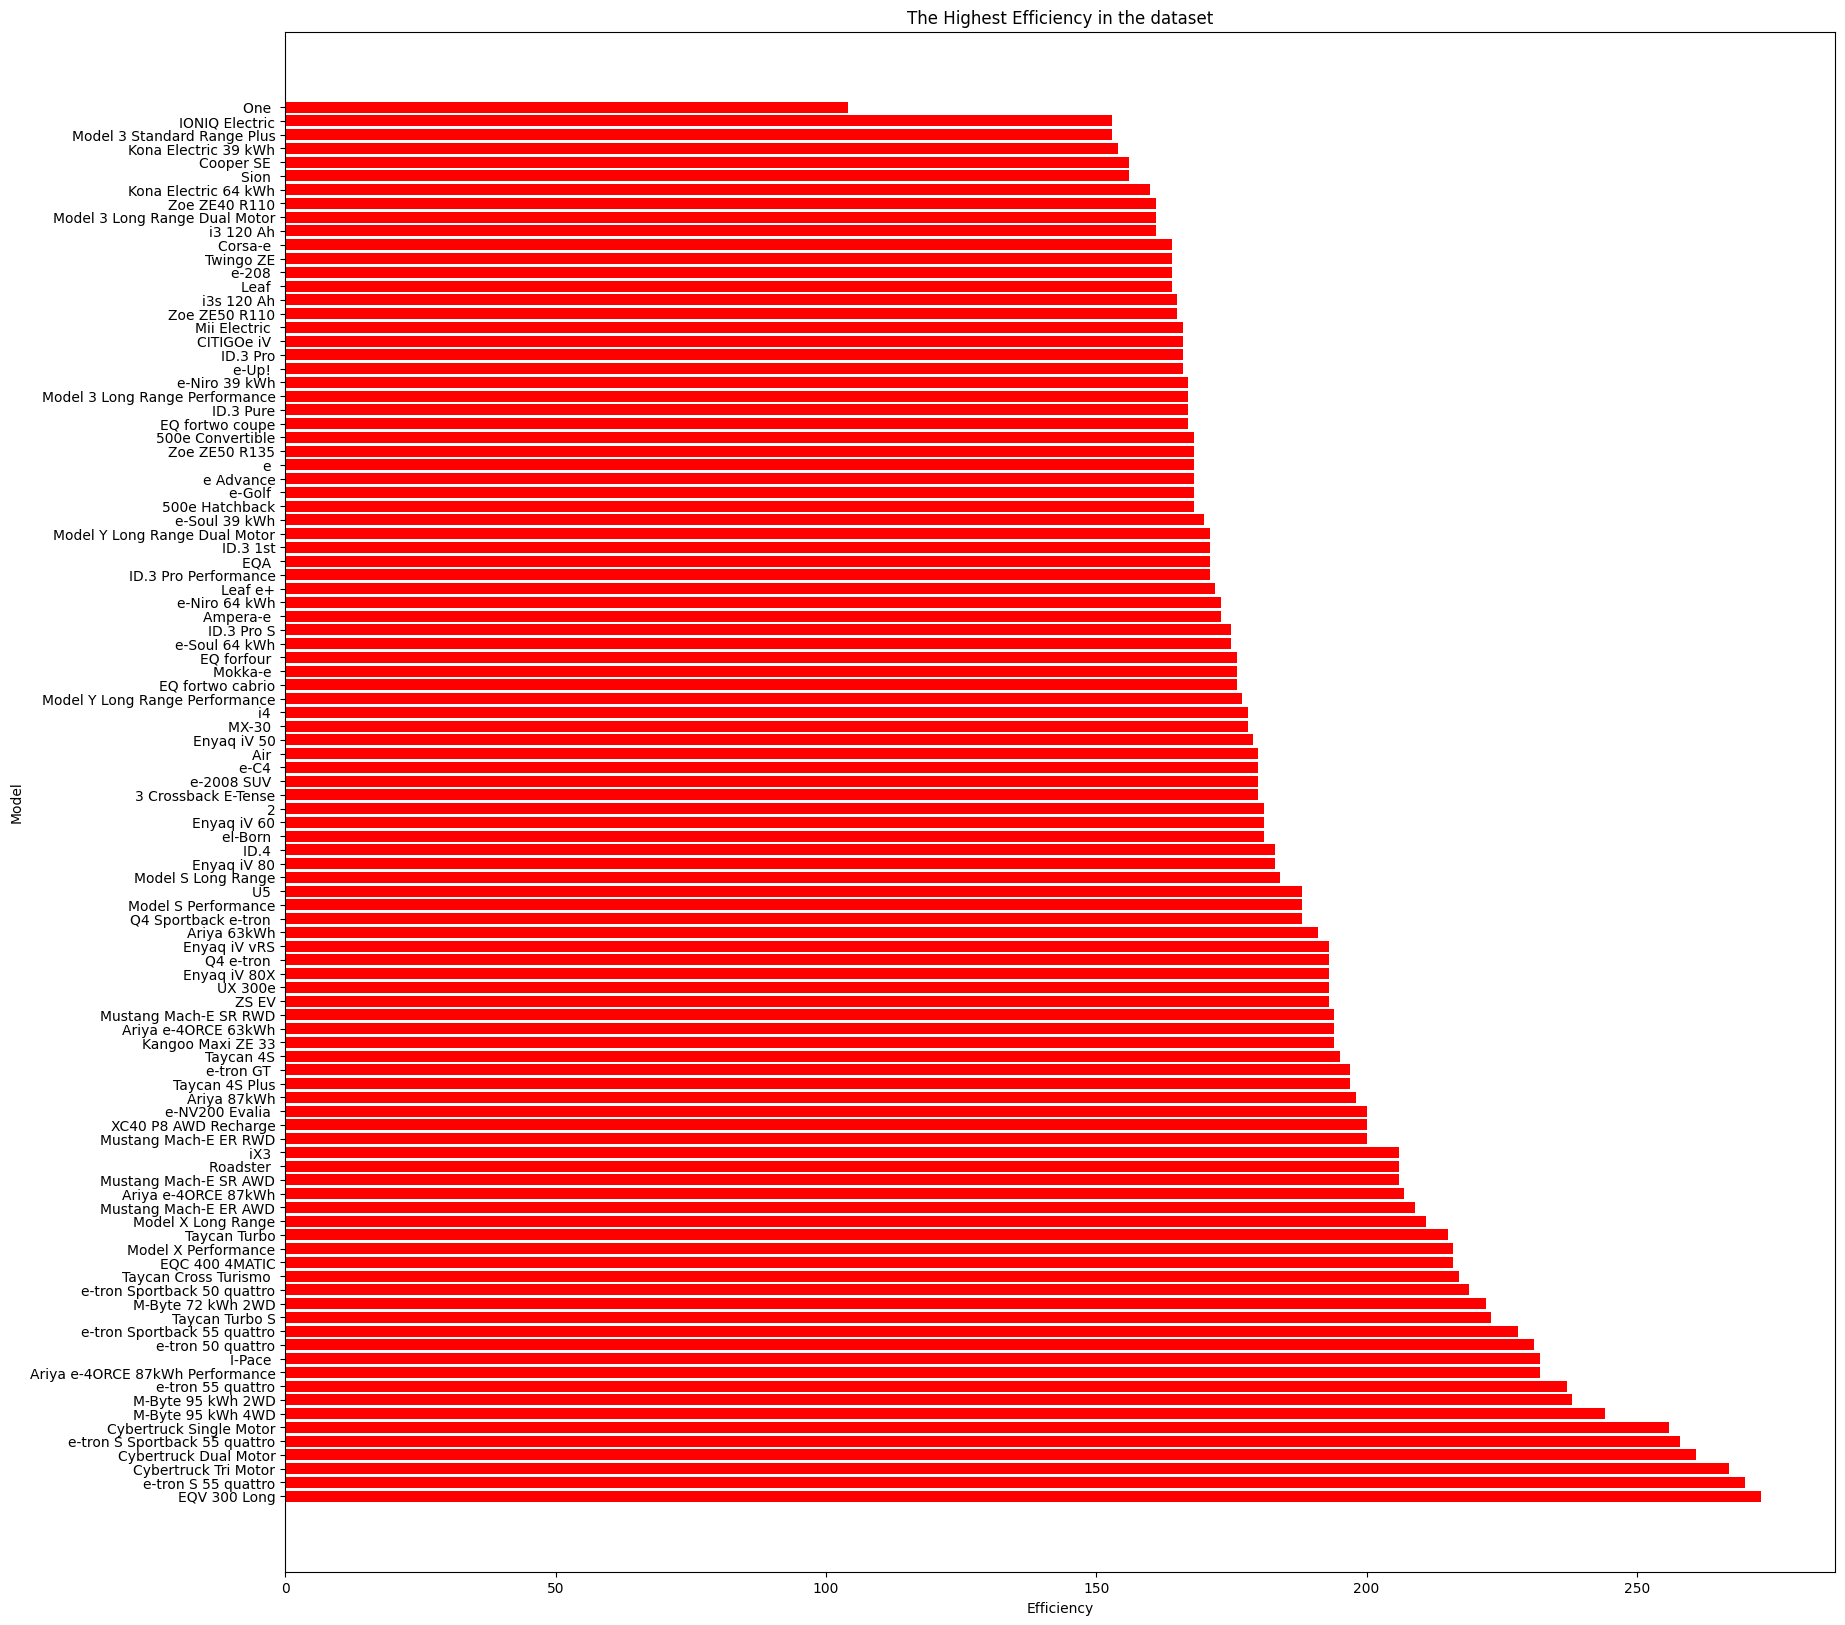

In [17]:
fig = plt.figure(figsize = (20, 20))
plt.barh(df_c["Model"], df_c["Efficiency_WhKm"], color = "red")
#plt.xticks(rotation = 90)
plt.title("The Highest Efficiency in the dataset")
plt.xlabel("Efficiency")
plt.ylabel("Model")

Does a difference in power train effect the range, top speed, efficiency?

In [18]:
df_sub = df[["PowerTrain", "TopSpeed_KmH", "Range_Km", 	"Efficiency_WhKm"]]

In [47]:
df_sub.groupby("PowerTrain").sum()

,TopSpeed_KmH,Range_Km,Efficiency_WhKm
PowerTrain,,,
AWD,8893,17485,8477
FWD,5504,9925,6496
RWD,4060,7485,4511


In [20]:
df["TopSpeed_KmH"].sum()

18457

<Axes: ylabel='TopSpeed_KmH'>

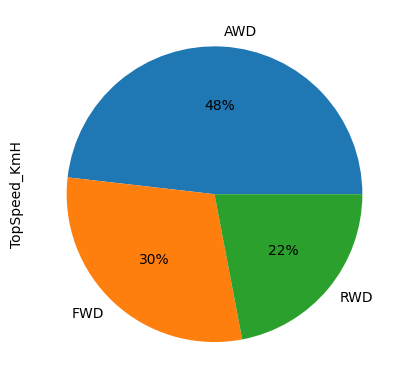

In [21]:
df_sub.groupby("PowerTrain").sum().TopSpeed_KmH.plot(kind = "pie", autopct = "%1.f%%")

<Axes: ylabel='Range_Km'>

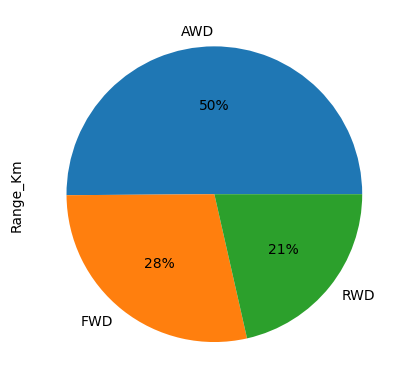

In [22]:
df_sub.groupby("PowerTrain").sum().	Range_Km.plot(kind = "pie", autopct = "%1.f%%")

<Axes: ylabel='Efficiency_WhKm'>

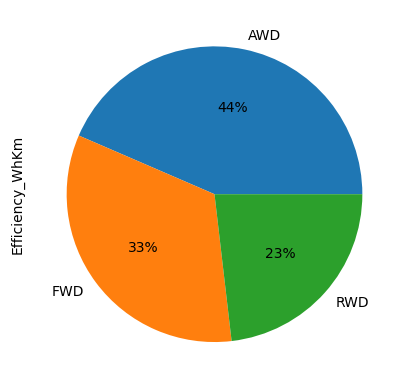

In [23]:
df_sub.groupby("PowerTrain").sum().Efficiency_WhKm.plot(kind = "pie", autopct = "%1.f%%")

WHICH CAR HAS THE FASTEST 0-100 ACCELERATION

In [24]:
# Sort the DataFrame by the 'AccelSec' column in ascending order
sorted_df = df.sort_values(by='AccelSec')

# The car with the quickest acceleration will be at the top of the sorted DataFrame
fastest_car = sorted_df.iloc[0]

# Print information about the fastest car
print("Fastest Car:")
print(f"Brand: {fastest_car['Brand']}")
print(f"Model: {fastest_car['Model']}")
print(f"Acceleration (0-100 km/h): {fastest_car['AccelSec']} seconds")

Fastest Car:
Brand: Tesla 
Model: Roadster 
Acceleration (0-100 km/h): 2.1 seconds


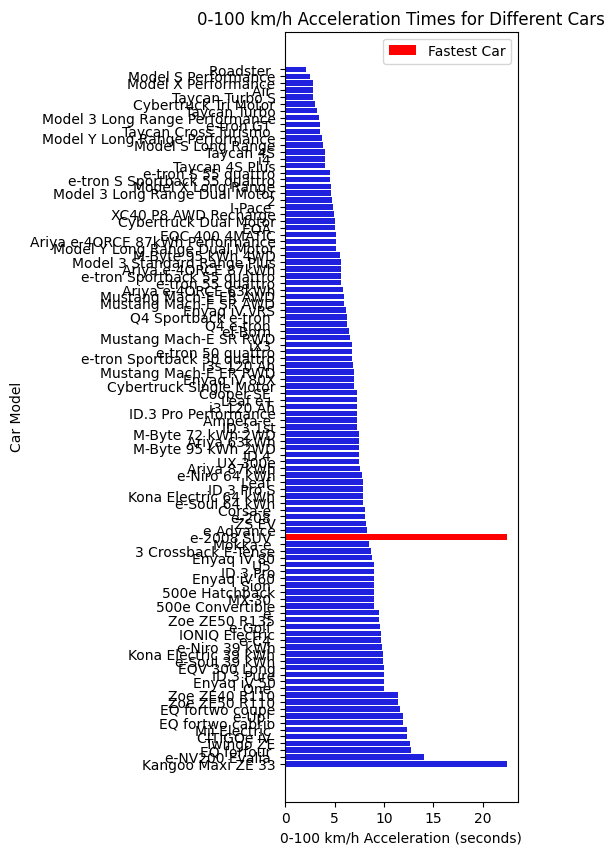

In [30]:
# Sort the DataFrame by the 'AccelSec' column in ascending order
sorted_df = df.sort_values(by='AccelSec')

# Create a bar plot to visualize the acceleration times
plt.figure(figsize=(3, 10))

# Plot all cars in blue
sns.barplot(x='AccelSec', y='Model', data=sorted_df, color='blue')

# Highlight the car with the highest acceleration time in red
max_acceleration = sorted_df['AccelSec'].max()
max_acceleration_car = sorted_df[sorted_df['AccelSec'] == max_acceleration]
plt.barh(max_acceleration_car.index, max_acceleration_car['AccelSec'], color='red', label='Fastest Car')

# Add labels and title
plt.xlabel('0-100 km/h Acceleration (seconds)')
plt.ylabel('Car Model')
plt.title('0-100 km/h Acceleration Times for Different Cars')

# Add a legend for the highlighted car
plt.legend()

# Show the plot
plt.show()

Well, this is pretty clumsy, don't think anything can be achieved with this, Why don't we check for the top 5 instead

C:\Users\DONKAMS\AppData\Local\Temp\ipykernel_6872\2891895734.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AccelSec', y='Model', data=top_5_cars, palette='Set2')


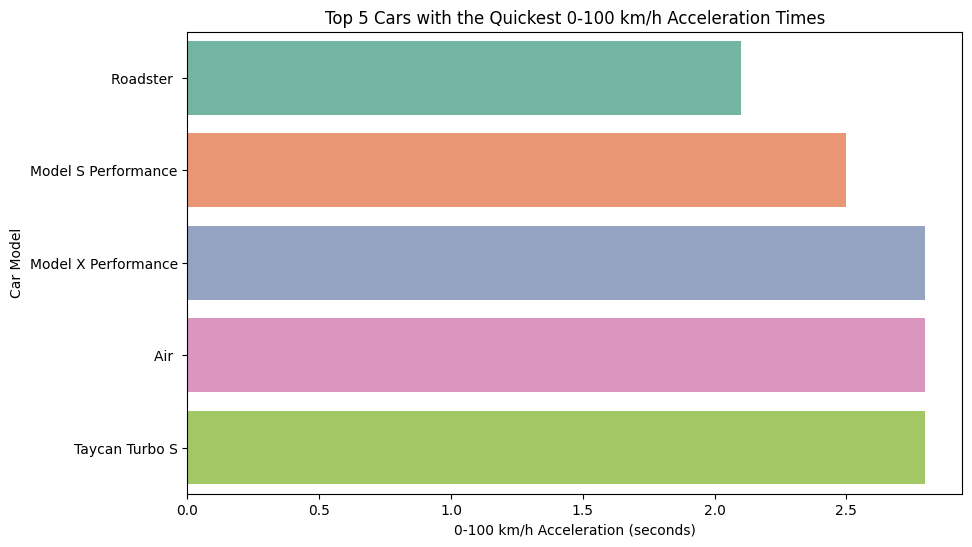

In [34]:
# Sort the DataFrame by the 'AccelSec' column in ascending order
sorted_df = df.sort_values(by='AccelSec')

# Select the top 5 cars with the quickest acceleration times
top_5_cars = sorted_df.head(5)

# Create a bar plot to visualize the acceleration times for the top 5 cars
plt.figure(figsize=(10, 6))

# Plot the top 5 cars in a different color
sns.barplot(x='AccelSec', y='Model', data=top_5_cars, palette='Set2')

# Add labels and title
plt.xlabel('0-100 km/h Acceleration (seconds)')
plt.ylabel('Car Model')
plt.title('Top 5 Cars with the Quickest 0-100 km/h Acceleration Times')

# Show the plot
plt.show()

## WHICH CAR MODEL HAS THE HIGHEST EFFICIENCY

In [40]:
# Find the row with the highest efficiency
highest_efficiency_car = df[df['Efficiency_WhKm'] == df['Efficiency_WhKm'].max()]

# Extract the model of the car with the highest efficiency
highest_efficiency_model = highest_efficiency_car['Model'].values[0]

print(f"The model with the highest efficiency is: {highest_efficiency_model}")


The model with the highest efficiency is: EQV 300 Long


C:\Users\DONKAMS\AppData\Local\Temp\ipykernel_6872\2229740431.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Efficiency_WhKm', y='Model', data=sorted_df_head, palette='viridis')


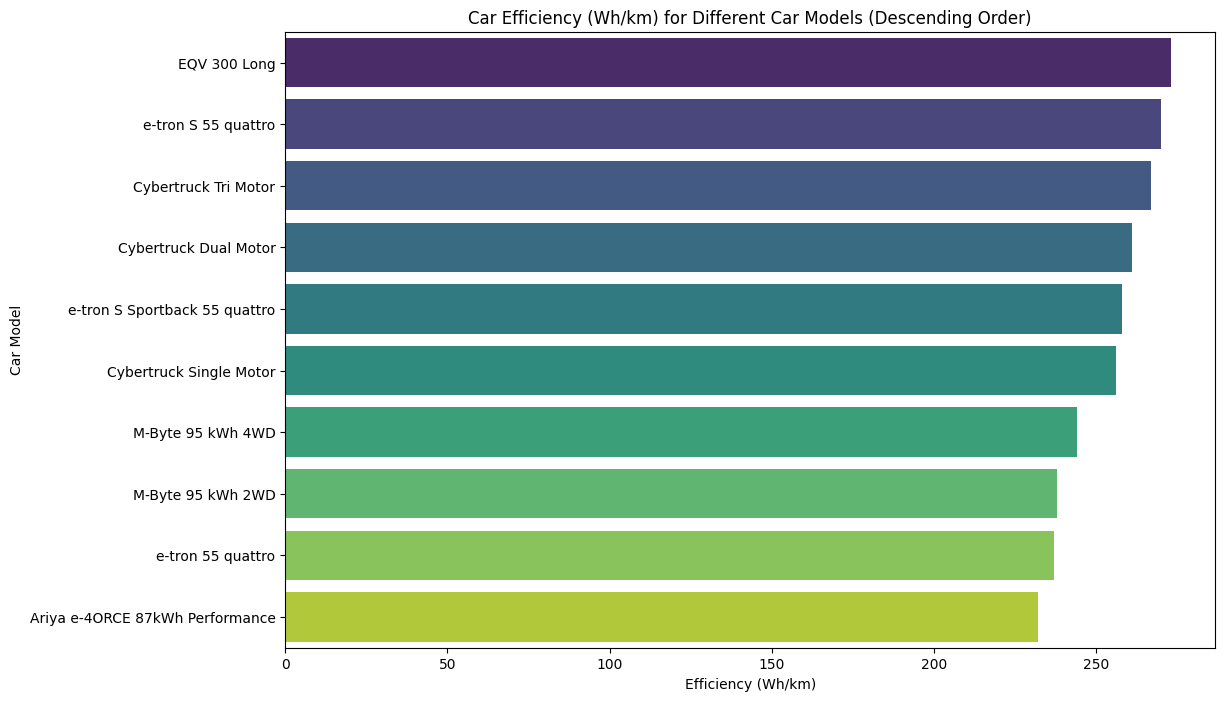

In [41]:
# Sort the DataFrame by efficiency in descending order
sorted_df = df.sort_values(by='Efficiency_WhKm', ascending=False)
sorted_df_head = sorted_df.head(10)

# Create a bar plot to visualize all car models and their efficiencies
plt.figure(figsize=(12, 8))

# Plot all cars with different colors
sns.barplot(x='Efficiency_WhKm', y='Model', data=sorted_df_head, palette='viridis')

# Add labels and title
plt.xlabel('Efficiency (Wh/km)')
plt.ylabel('Car Model')
plt.title('Car Efficiency (Wh/km) for Different Car Models (Descending Order)')

# Show the plot
plt.show()

The Car Model with the highest efficiency is the EQV 300 Long

## Does a difference in power train effect the range, top speed, efficiency?

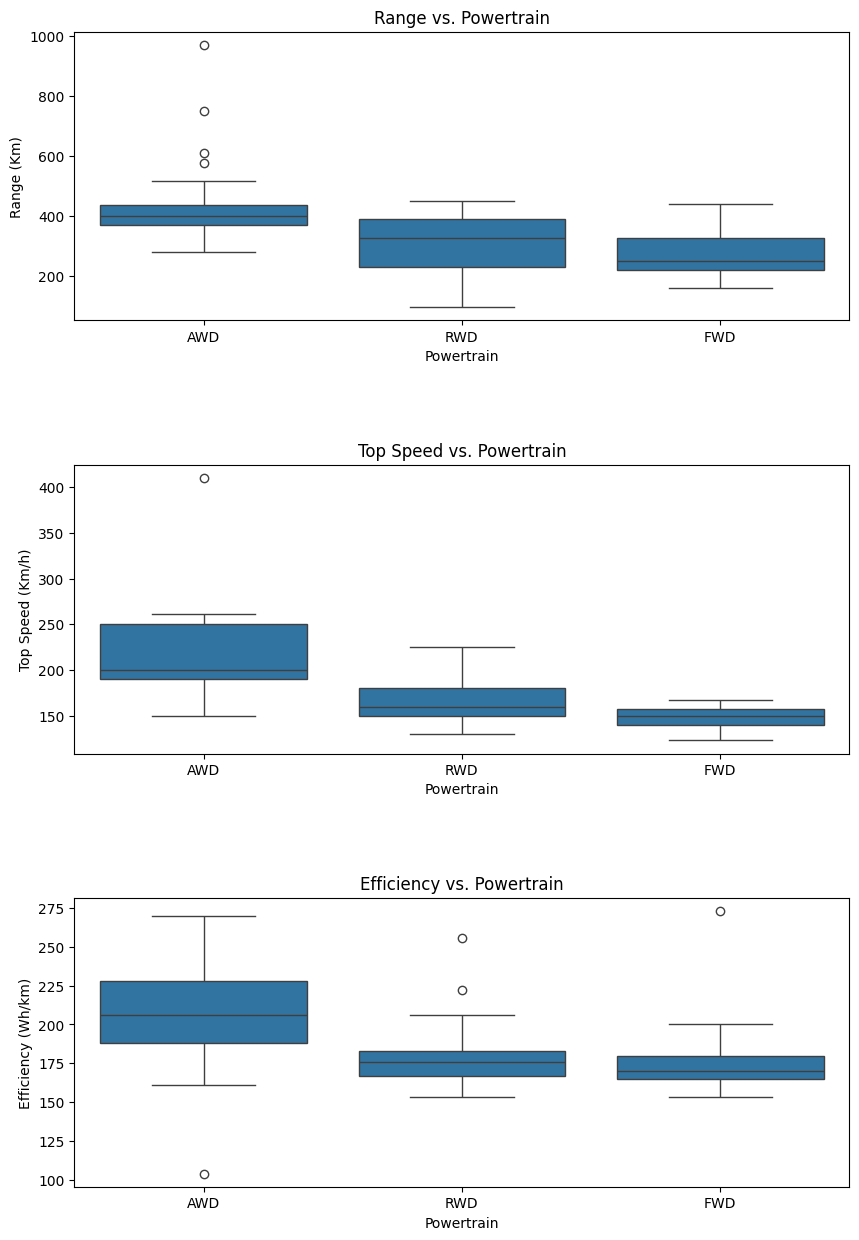

In [42]:
# Create subplots for range, top speed, and efficiency
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
plt.subplots_adjust(hspace=0.5)

# Analyze Range vs. Powertrain
sns.boxplot(x='PowerTrain', y='Range_Km', data=df, ax=axes[0])
axes[0].set_title('Range vs. Powertrain')
axes[0].set_xlabel('Powertrain')
axes[0].set_ylabel('Range (Km)')

# Analyze Top Speed vs. Powertrain
sns.boxplot(x='PowerTrain', y='TopSpeed_KmH', data=df, ax=axes[1])
axes[1].set_title('Top Speed vs. Powertrain')
axes[1].set_xlabel('Powertrain')
axes[1].set_ylabel('Top Speed (Km/h)')

# Analyze Efficiency vs. Powertrain
sns.boxplot(x='PowerTrain', y='Efficiency_WhKm', data=df, ax=axes[2])
axes[2].set_title('Efficiency vs. Powertrain')
axes[2].set_xlabel('Powertrain')
axes[2].set_ylabel('Efficiency (Wh/km)')

# Show the plots
plt.show()

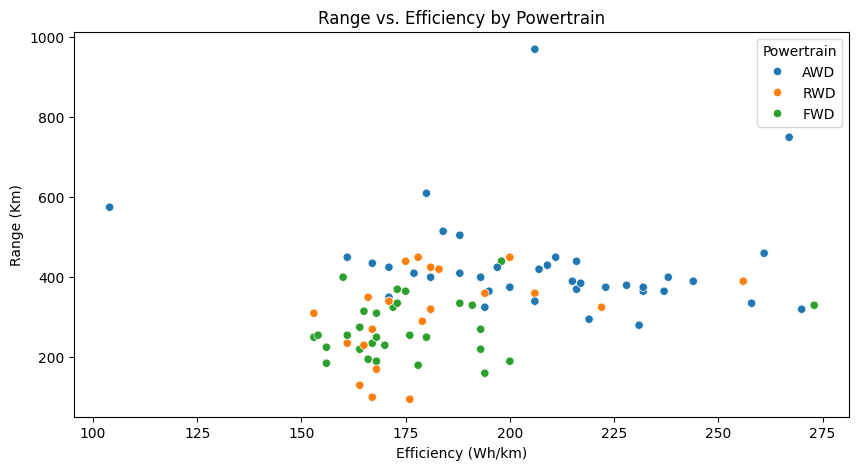

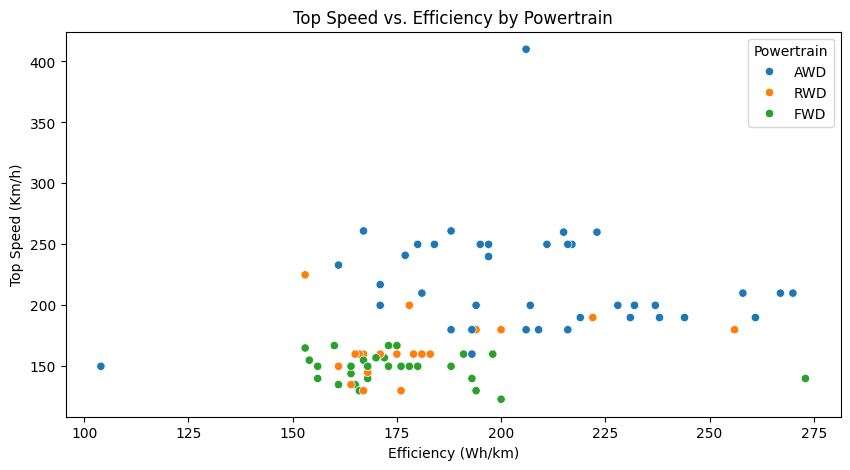

In [43]:
# Create a scatter plot for Range vs. Efficiency
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Efficiency_WhKm', y='Range_Km', hue='PowerTrain', data=df)
plt.title('Range vs. Efficiency by Powertrain')
plt.xlabel('Efficiency (Wh/km)')
plt.ylabel('Range (Km)')
plt.legend(title='Powertrain')
plt.show()

# Create a scatter plot for Top Speed vs. Efficiency
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Efficiency_WhKm', y='TopSpeed_KmH', hue='PowerTrain', data=df)
plt.title('Top Speed vs. Efficiency by Powertrain')
plt.xlabel('Efficiency (Wh/km)')
plt.ylabel('Top Speed (Km/h)')
plt.legend(title='Powertrain')
plt.show()

The power range has much bigger effect in the Efficiency and Top speed compared to the Range 

## Which manufacturer has the most number of vehicles?

In [44]:
# Count the number of vehicles for each manufacturer
manufacturer_counts = df['Brand'].value_counts()

# Find the manufacturer with the highest number of vehicles
most_common_manufacturer = manufacturer_counts.idxmax()
count_of_most_common_manufacturer = manufacturer_counts.max()

print(f"The manufacturer with the most number of vehicles is {most_common_manufacturer} with {count_of_most_common_manufacturer} vehicles.")


The manufacturer with the most number of vehicles is Tesla  with 13 vehicles.


C:\Users\DONKAMS\AppData\Local\Temp\ipykernel_6872\2468779512.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_manufacturers.values, y=top_10_manufacturers.index, palette='viridis')


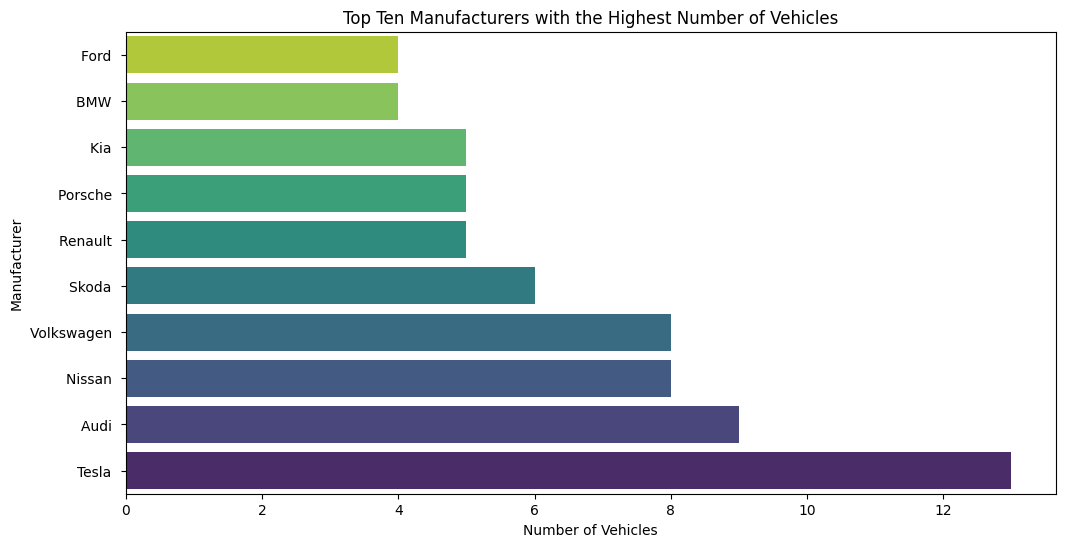

In [45]:
# Count the number of vehicles for each manufacturer
manufacturer_counts = df['Brand'].value_counts()

# Select the top ten manufacturers with the highest number of vehicles
top_10_manufacturers = manufacturer_counts.head(10)

# Create a bar plot to visualize the top ten manufacturers
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_manufacturers.values, y=top_10_manufacturers.index, palette='viridis')
plt.xlabel('Number of Vehicles')
plt.ylabel('Manufacturer')
plt.title('Top Ten Manufacturers with the Highest Number of Vehicles')
plt.gca().invert_yaxis()  # Reverse the order to have the highest count at the top
plt.show()

It's apparent that tesla has the highest number of cars been manufactured

## How does price relate to rapid charging?

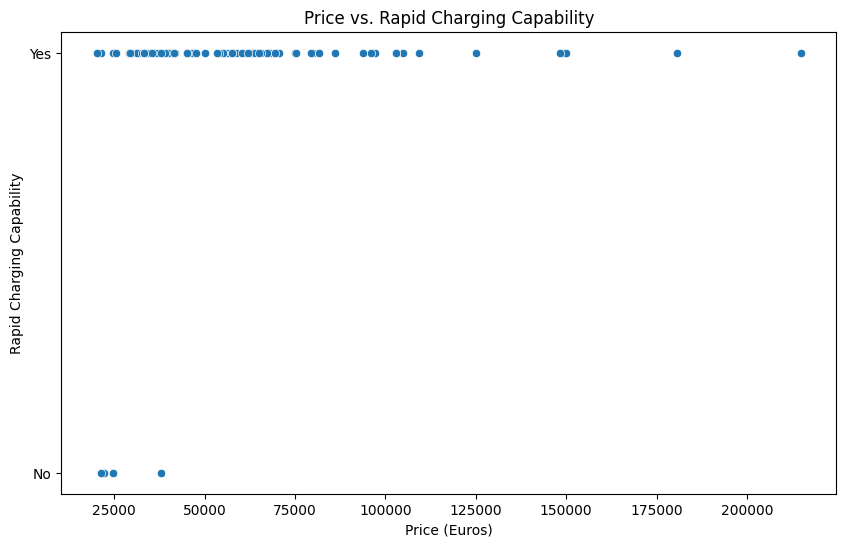

In [46]:
# Create a scatter plot for PriceEuro vs. RapidCharge
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PriceEuro', y='RapidCharge', data=df)
plt.title('Price vs. Rapid Charging Capability')
plt.xlabel('Price (Euros)')
plt.ylabel('Rapid Charging Capability')
plt.show()


Since rapid charging is a categorical target variable, the graph is hence a logistic Probabuilitic distribution one
Also, an higher price tends to increase the chances of Rapid charging capability